## Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [275]:
rng = np.random.RandomState(10)
x = 12.5 * rng.rand(50)
y = 4.6 * x - 8.45 + rng.randn(50)
m=x.shape[0]

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x.reshape(-1, 1))  

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) 

In [276]:
def loss_cube(y_hat, y):
    loss = np.abs(y_hat - y) ** 3
    return loss

In [277]:
def hypothesis_linear(x,w,b):
    return w*x+b

In [278]:
def gradient_descent_cubic_linear(x,y,w,b,learning_rate,m,error):

   while(error>10^-2):
        y_hat=hypothesis(x,w,b)
        dw = (3 / m) * np.sum(np.multiply((y_hat - y) ** 2, x))
        db = (3 / m) * np.sum((y_hat - y) ** 2)
        w_new=learning_rate * dw
        b_new=learning_rate * db
        error=loss_cube(y,y_hat)
        return w,b,error

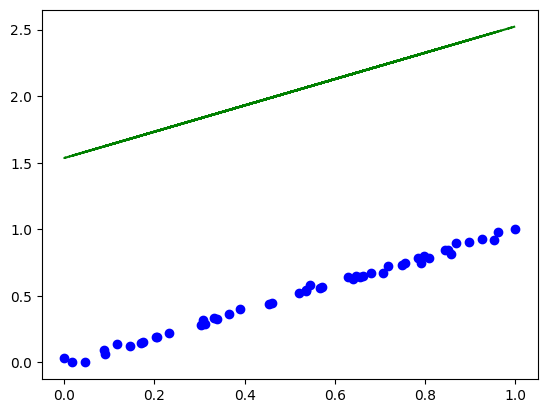

In [279]:
w = np.random.randn(1)
b = np.random.randn(1)

learning_rate = 0.001

error=10

m=x.shape[0]

w, b,error = gradient_descent_cubic_linear(x_scaled, y_scaled, w, b, learning_rate, m,error)

y_hat = hypothesis(x_scaled, w, b)
plt.plot(x_scaled, y_scaled, 'bo')
plt.plot(x_scaled, y_hat, 'g--')
plt.show()



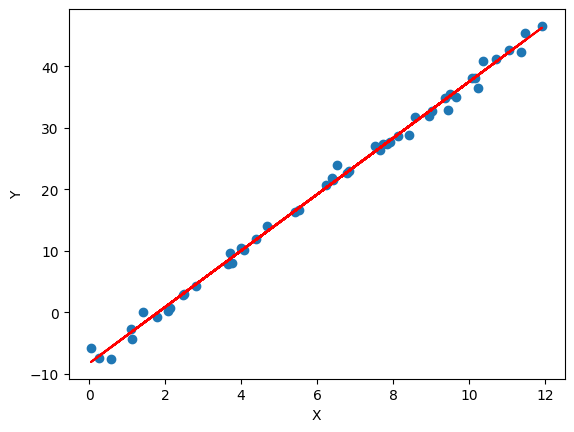

In [280]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_scaled, y_scaled)

y_pred_scaled = model.predict(x_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## polynomial

In [281]:
rng = np.random.RandomState(10)
x2 = 10.5 * rng.rand(50)
y2 = 4 * x2 - 8.5+5.01*x2**2 + rng.randn(50)
m=x.shape[0]

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
x_scaled2 = scaler_x.fit_transform(x2.reshape(-1, 1))  

scaler_y = MinMaxScaler()
y_scaled2 = scaler_y.fit_transform(y2.reshape(-1, 1)) 

In [282]:
def loss_function_poly(y_hat, y):
    return np.mean(np.abs(y_hat - y) ** 7)

In [283]:
def hypothesis_poly(x, w):
    return w[0] + w[1] * x + w[2] * x ** 2

In [284]:
def gradient_descent(x, y, w, learning_rate, error):
     m = len(y)
     while (error>10^-3):
        prediction = hypothesis_poly(x, w)
        error = loss_function_poly(prediction,y)
        gradient = [(1 / m) * np.sum((error ** 7) * x ** i) for i in range(len(w))]
        w -= learning_rate * np.array(gradient)
     return w

w = np.random.randn(3)

In [ ]:
learning_rate = 0.00001
error=10

w_trained = gradient_descent(x_scaled2, y_scaled2, w, learning_rate, error)

plt.scatter(x_scaled2, y_scaled2)
y_vals = hypothesis_poly(x_scaled2, w_trained)
plt.plot(x_scaled2, y_vals, color='red')
plt.legend()
plt.show()

## Q2

In [ ]:
import pandas as pd

file_path = r'C:\Users\sidha\OneDrive - IIT Kanpur\Desktop\ML project\AirQualityUCI.xlsx'

df = pd.read_excel(file_path)

print(df.head())

In [ ]:
df.replace(-200, np.nan, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df['Time'] = df['Time'].astype(str)

df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time']

df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second

df.drop(['Date', 'Time', 'DateTime'], axis=1, inplace=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix ')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df_clean = remove_outliers_iqr(df.select_dtypes(include=np.number))


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')
plt.show()

print(f"r^2 score {r2}")
print(f"mean squared eror {mse}")



In [ ]:
X = df.drop(columns=['RH']) 
y = df['RH']

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

X_train = X_train
y_train = y_train.reshape(-1, 1)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]


theta = np.random.randn(X_train_b.shape[1], 1)

learning_rate = 0.01
iterations = 1000

theta_trained, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)

plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')
plt.show()

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"r^2 score {r2}")
print(f"mean squared error {mse}")

